# Car Price Prediction

In [35]:
# Importing Libraries
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
# To visualize all the columns in the dataframe, change display option
pd.set_option('display.max_columns', None)

In [36]:
# Read Car data
dataset = pd.read_csv('car data.csv')
dataset.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# 1. Understanding the Dataset

In [ ]:
dataset.shape

In [37]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [26]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

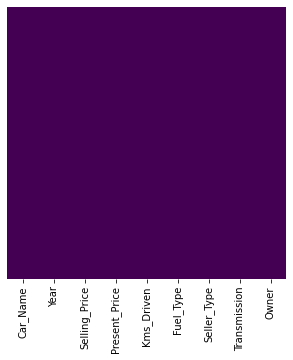

In [38]:
# Visualizing  Missing Values
plt.figure(figsize=[5,5])
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From above map, it is incurred that no missing values exist

In [28]:
dataset.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


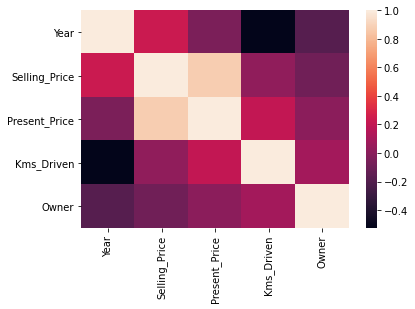

In [29]:
sns.heatmap(dataset.corr())

# 2.Exploratory Data Analysis

Univariate Analysis

cATEGORICAL columns: ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


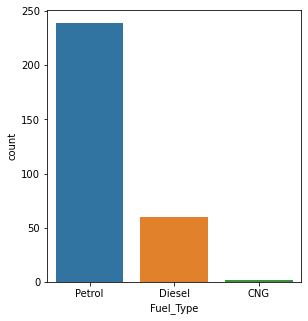

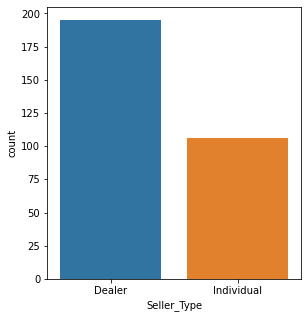

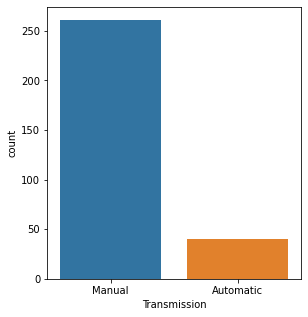

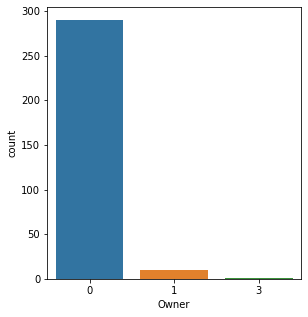

In [39]:
# Categorical Feature Visualization
#df_catgry=[feature for feature in dataset.columns if dataset[feature].dtype =='O' ]
df_catgry=[]
for feature in dataset.columns:
    if dataset[feature].nunique() < 5:
        df_catgry.append(feature)
   
print('cATEGORICAL columns:', df_catgry)
i = 0
while i < len(df_catgry):
    fig =plt.figure(figsize=[10,5])
    plt.subplot(1,2,1)
    sns.countplot(x=df_catgry[i],data=dataset)
    i +=1
    
    plt.show

# Numerical feature  to visualize outliers

In [40]:
from datetime import date
today =date.today().year
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [41]:
#Handling Year feature
dataset['Age'] = dataset['Year'].apply(lambda x: today-x)
dataset.drop(['Year','Car_Name'],axis=1,inplace=True)
dataset

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,5
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,6
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,12
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,4


['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']


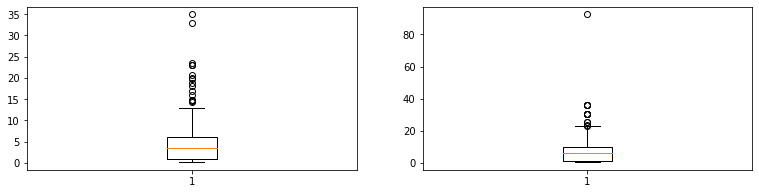

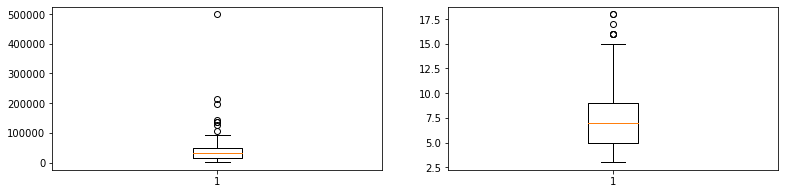

In [48]:
df_num = [feature for feature in dataset.columns if dataset[feature].dtype !='O' and feature not in df_catgry ]
print(df_num)
i=0 
while(i<len(df_num)):
    plt.figure(figsize=[13,3])
    plt.subplot(1,2,1)
    plt.boxplot(x=df_num[i],data=dataset)
    i+=1
    plt.subplot(1,2,2)
    plt.boxplot(x=df_num[i],data=dataset)
    i+=1
    plt.show()

Bivariate Analysis

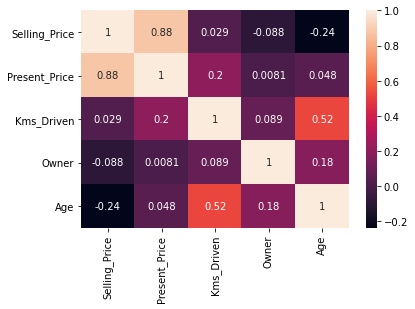

In [42]:
sns.heatmap(dataset.corr(),annot=True)

# Feature Engineering

In [43]:
# creating dummy variables and dropping first to avoid dummy variable trap
df=pd.get_dummies(data=dataset,drop_first=True)
dataset

In [45]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


Splitting Train and Test Data

In [47]:
from sklearn.model_selection import train_test_split
y = df['Selling_Price']
x = df.drop('Selling_Price', axis=1)


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (210, 8)
x test:  (91, 8)
y train:  (210,)
y test:  (91,)


# Model Building